In [80]:
#%pip install redis
import pandas as pd
import redis
from plantd_modeling import configuration, metrics
# pip command for installying the python redis
import os
import io
import matplotlib.pyplot as plt

os.environ['REDIS_HOST'] = 'localhost'
os.environ['REDIS_PASSWORD'] = ''


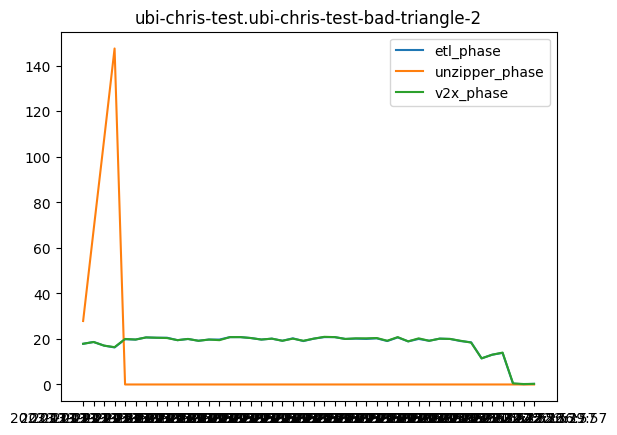

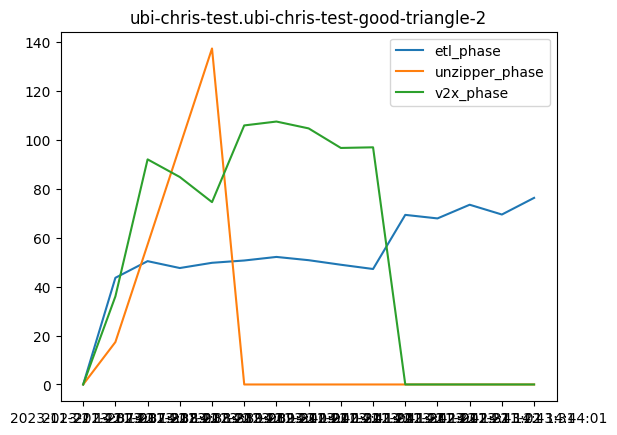

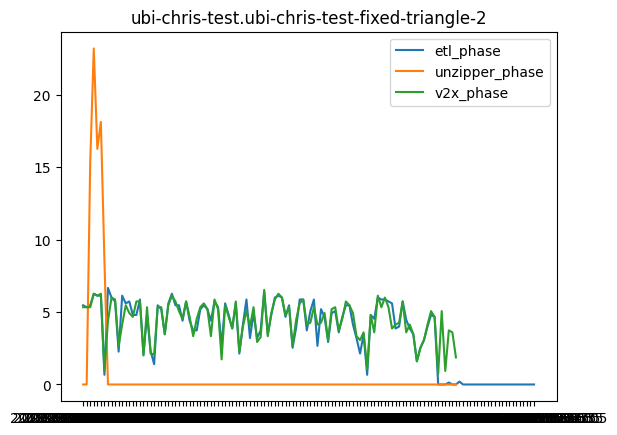

In [136]:
experiments = ["ubi-chris-test.ubi-chris-test-bad-triangle-2", "ubi-chris-test.ubi-chris-test-good-triangle-2", "ubi-chris-test.ubi-chris-test-fixed-triangle-2"]
for experiment in experiments:
    exp = metrics.redis.load_str("metrics", experiment)
    df = pd.read_csv(io.StringIO(exp))
    df.set_index("time", inplace=True)
    plt.plot(df)
    plt.legend(df.columns)
    plt.title(experiment)
    plt.show()


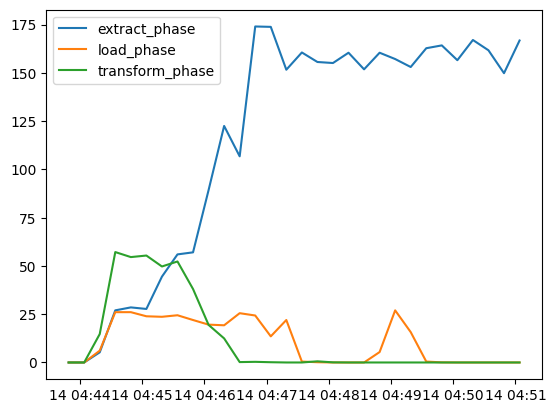

In [4]:


plt.plot(exp.metrics[0:30])

plt.legend(exp.metrics.columns)


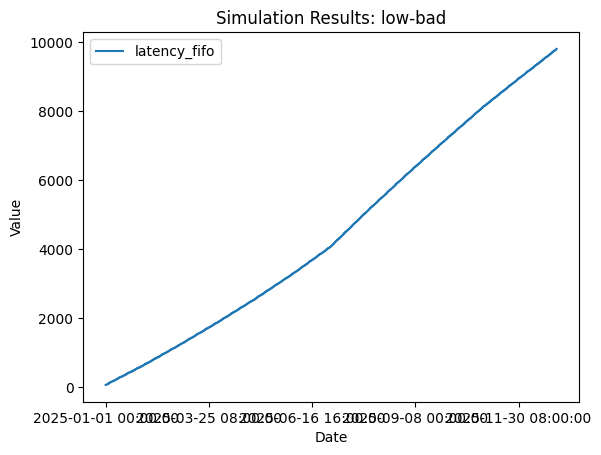

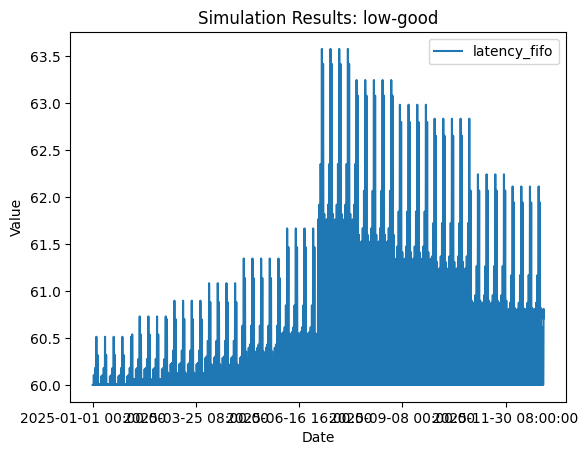

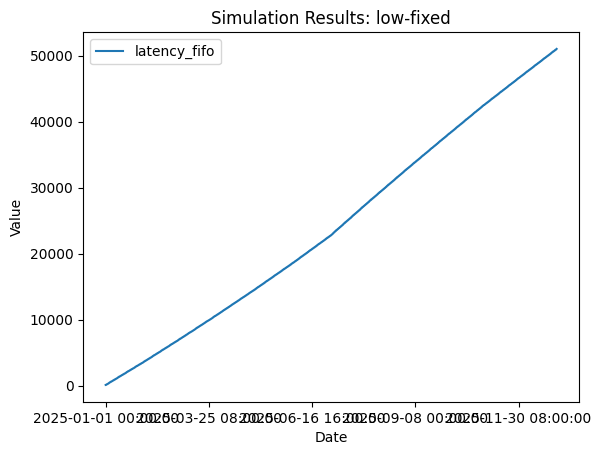

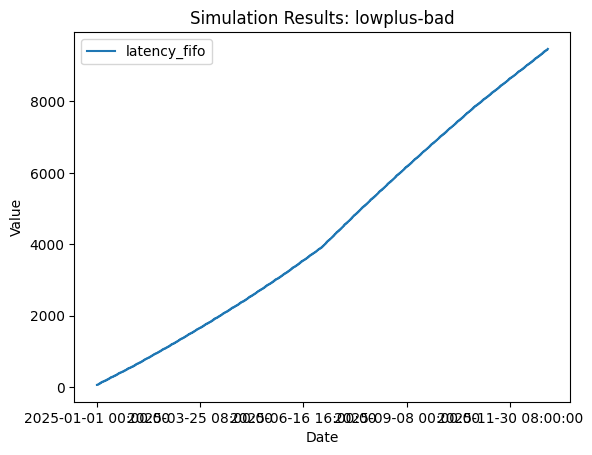

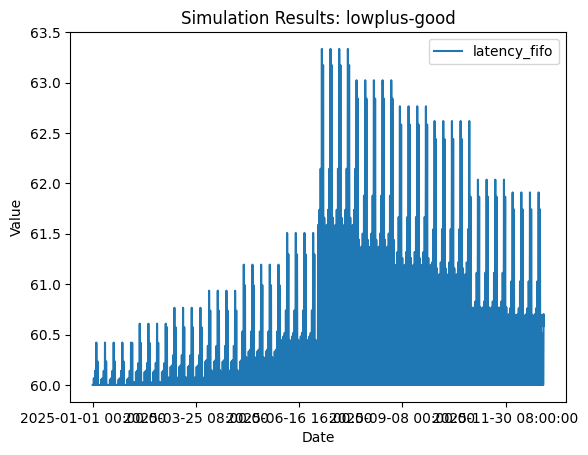

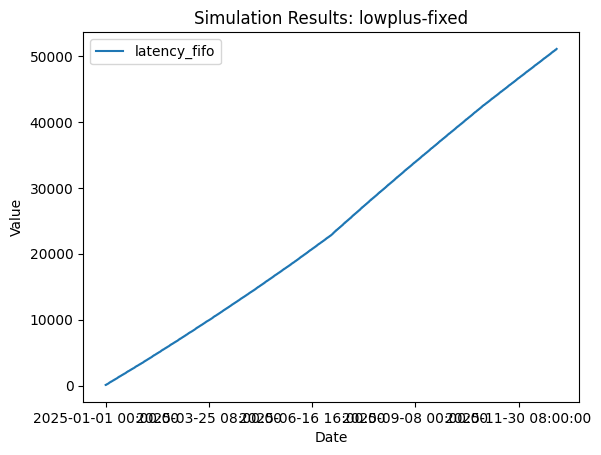

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from plantd_modeling import metrics
runs = ["low-bad", "low-good", "low-fixed", "lowplus-bad", "lowplus-good", "lowplus-fixed"]#, "nom-bad", "nom-good"]

for run in runs:
    # Load the CSV file into a pandas DataFrame
    #df = pd.read_csv(f"oldfakeredis/simulation_test-{run}-tri.csv")
    raw = metrics.redis.load_str("simulation_traffic", f"test-{run}-tri")
    #print(run, raw)
    df = pd.read_csv(io.StringIO(raw), index_col=0, parse_dates=True)

    #print(df.head())
    #pri#nt(df)
    # Convert the "date" column to datetime format
    #df["date"] = pd.to_datetime(df["date"])

    # Set the "date" column as the index
    df.set_index("date", inplace=True)

    # Limit to June 30 through July 7
    #df = df.loc["2025-06-23":"2025-07-07"]

    # Plot the columns "cost", "scaleout", "hourly", "queue_len", "latency_fifo", "throughput", "scaleout" by date
    df[["latency_fifo" ]].plot()  #, "throughput""hourly",
    #
    # Add labels and a legend
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title(f"Simulation Results: {run}")
    plt.legend()

    # Show the plot
    plt.show()


In [ ]:
# easiness of configuring
# onboarding users
# flexibility of runnign experiments
# In results, include the stakeholders!
# cost estimtation
   # experiment cost useful to an engineer
# use case
  # add 3rd use case: requesitng use case affects costs
  # business case cost useful to a business analyst


# run "redis stack" in docker locally to test redis, use time series
# time series documentation is in the cost exporter


In [116]:
import json

print("{:<10} {:<10} {:<10} {:<20} {:<20} {:<20} {:<10}".format("run", "cost", "latency", "avg_throughput_rph", "max_throughput_rph", "pct_latency_met", "sla_met"))
for run in runs:
    inf = json.loads(metrics.redis.load_str("simulation_summary", f"test-{run}-tri"))
    print("{:<10} {:<10.2f} {:<10.2f} {:<20.2f} {:<20.2f} {:<20.2f} {:<10}".format(run, inf["total_cost"], inf["avg_latency_s"], inf["avg_throughput_rph"], inf["max_throughput_rph"], inf["sla_check"]["pct_latency_met"], inf["sla_check"]["sla_met"]))


run        cost       latency    avg_throughput_rph   max_throughput_rph   pct_latency_met      sla_met   
low-bad    61.92      4510.52    1.67                 1.67                 0.22                 False     
low-good   411.40     60.30      3.53                 5.71                 100.00               True      
low-fixed  18.50      24182.98   0.52                 0.52                 0.00                 False     
lowplus-bad 61.92      4348.25    1.67                 1.67                 0.22                 False     
lowplus-good 411.40     60.26      3.46                 5.71                 100.00               True      
lowplus-fixed 18.15      24199.34   0.51                 0.51                 0.00                 False     


In [79]:
x = metrics.redis.load_str("simulation_summary", "test-low-bad-tri")
import os
redis_host = os.environ.get("REDIS_HOST", None)
print(redis_host, x)

localhost {"total_cost": 0.0, "avg_latency_s": 60.0, "max_latency_s": 60.0, "avg_queue": 0.0, "max_queue": 0.0, "avg_throughput_rph": 3.526104494534767, "max_throughput_rph": 9.234250878207435, "sla_check": {"sla_met": "True", "pct_latency_met": 100.0}}


/var/folders/qr/gzr584k90hncw75zzl7nwgpm0000gp/T/ipykernel_87562/735209035.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(io.StringIO(raw), index_col=0, parse_dates=True)
/var/folders/qr/gzr584k90hncw75zzl7nwgpm0000gp/T/ipykernel_87562/735209035.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(io.StringIO(raw), index_col=0, parse_dates=True)


<Axes: xlabel='date'>

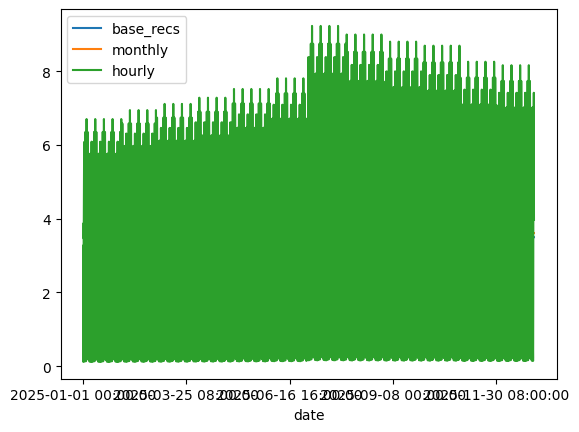

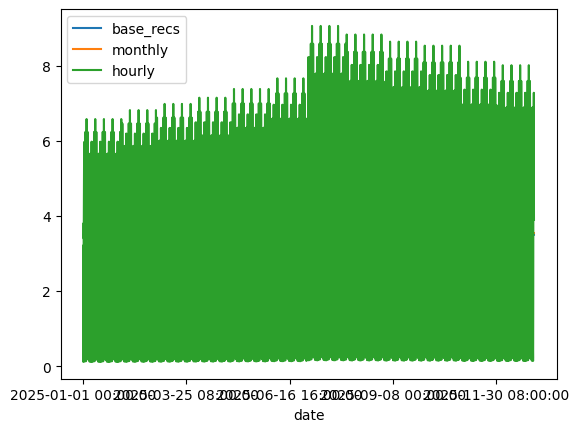

In [113]:
raw = metrics.redis.load_str("trafficmodel_predictions", f"traffic-model-low")
df = pd.read_csv(io.StringIO(raw), index_col=0, parse_dates=True)
df.set_index("date", inplace=True)
df[["base_recs","monthly","hourly"]].plot()

raw = metrics.redis.load_str("trafficmodel_predictions", f"traffic-model-lowplus")
df = pd.read_csv(io.StringIO(raw), index_col=0, parse_dates=True)
df.set_index("date", inplace=True)
df[["base_recs","monthly","hourly"]].plot()

In [142]:
for experiment in experiments:
    print(experiment)
    inf = json.loads(metrics.redis.load_str("experiment_cost", experiment))
    total_cost = sum([inf[x]["total_cost"] for x in inf])
    direct_cost = sum([inf[x]["direct_cost"] for x in inf])
    shared_cost = sum([inf[x]["shared_cost"] for x in inf])
    print(experiment, total_cost, direct_cost, shared_cost)


ubi-chris-test.ubi-chris-test-bad-triangle-2
ubi-chris-test.ubi-chris-test-bad-triangle-2 0.002835065024171772 0.002464694653801402 0.00037037037037037035
ubi-chris-test.ubi-chris-test-good-triangle-2
ubi-chris-test.ubi-chris-test-good-triangle-2 0.005493446960187641 0.00512307658981727 0.0003703703703703704
ubi-chris-test.ubi-chris-test-fixed-triangle-2
ubi-chris-test.ubi-chris-test-fixed-triangle-2 0.0027353115809084626 0.0023649412105380923 0.00037037037037037035


ubi-chris-test.ubi-chris-test-bad-triangle-2
                  time  etl_phase  etl_phase_latency  unzipper_phase   
0  2023-11-22 22:15:57  17.873817          47.674484       27.877818  \
1  2023-11-22 22:16:27  18.666044          40.481488       67.864405   
2  2023-11-22 22:16:57  17.064392          45.465045      107.585657   
3  2023-11-22 22:17:27  16.266668          53.396732      147.600010   
4  2023-11-22 22:17:57  19.866667          38.015167        0.000000   

   unzipper_phase_latency  v2x_phase  v2x_phase_latency  
0               10.618516  17.873817         106.502419  
1                9.625255  18.666044         101.692299  
2                9.039398  17.064392         111.575145  
3               11.623508  16.400001         116.506200  
4                     NaN  20.000000          96.800410  


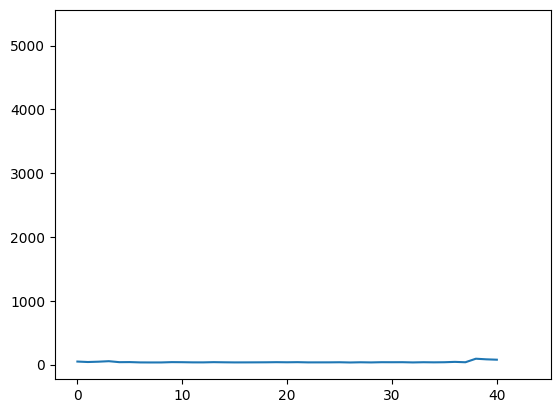

ubi-chris-test.ubi-chris-test-good-triangle-2
                  time  etl_phase  etl_phase_latency  unzipper_phase   
0  2023-11-22 14:37:01   0.000000                NaN        0.000000  \
1  2023-11-22 14:37:31  43.604361          34.986276       17.335067   
2  2023-11-22 14:38:01  50.405041          38.076308       57.205721   
3  2023-11-22 14:38:31  47.595241          40.536163       97.323602   
4  2023-11-22 14:39:01  49.733333          38.588864      137.333333   

   unzipper_phase_latency  v2x_phase  v2x_phase_latency  
0                     NaN   0.000000                NaN  
1                4.806958  36.003601          18.892687  
2                7.464317  92.009202          19.252431  
3                8.750168  84.791522          21.324040  
4                8.228895  74.533333          23.234174  


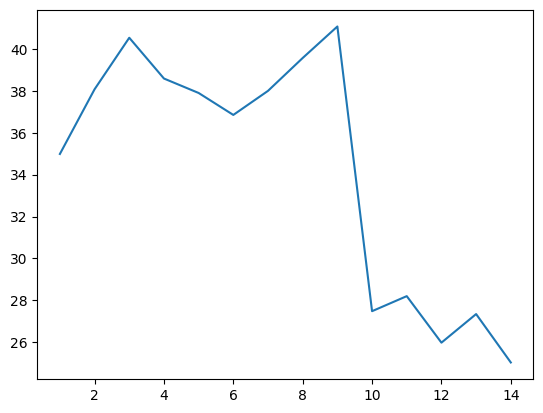

ubi-chris-test.ubi-chris-test-fixed-triangle-2
                  time  etl_phase  etl_phase_latency  unzipper_phase   
0  2023-11-23 13:55:35   5.466667          70.701341        0.000000  \
1  2023-11-23 13:56:05   5.333333          74.726592        0.000000   
2  2023-11-23 13:56:35   5.466667         106.721230       15.333333   
3  2023-11-23 13:57:05   6.266249          71.505603       23.198454   
4  2023-11-23 13:57:35   6.133333                NaN       16.266667   

   unzipper_phase_latency  v2x_phase  v2x_phase_latency  
0                     NaN   5.333333         337.577122  
1                     NaN   5.333333         321.092489  
2             2603.442703   5.333333         345.952076  
3             6570.042332   6.266249         281.552117  
4             9309.048131   6.133333                NaN  


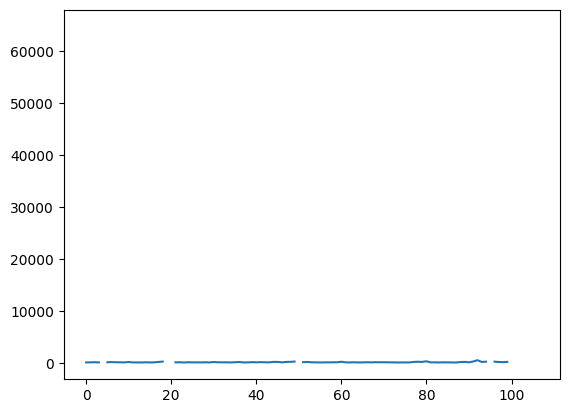

In [146]:
for experiment in experiments:
    print(experiment)
    inf = pd.read_csv(io.StringIO(metrics.redis.load_str("metrics", experiment)))
    print(inf.head())
    inf[["unzipper_phase_latency","etl_phase_latency", "v2x_phase_latency"]].plot()
    plt.title(experiment)
    plt.show()